Show some ways of getting $\pi$
====

In [292]:
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt, cm
import seaborn as sns

Sampling
------

Sample from a circle. The ratio between the number of uniform samples falling in a square with sidelength 2 and the samples which fall into the circle enclosed by this square can be used to calculate $\pi$. Down below the ratio between uniformly distributed random samples falling into the red area and samples falling into the purple area are $\tfrac\pi4$.

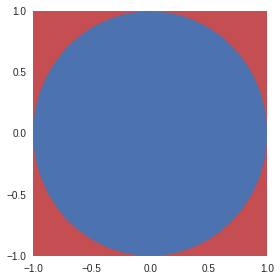

In [22]:
fig, ax = plt.subplots(figsize=(4,4))

colors = sns.color_palette()
b = colors[0]
r = colors[2]

ax.add_patch(plt.Rectangle((-1,-1), 2, 2, fill=True, facecolor=r, edgecolor='none', lw=2, alpha=1))
ax.add_patch(plt.Circle((0,0), 1, fill=True, facecolor=b, edgecolor='none', alpha=1))
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)

None

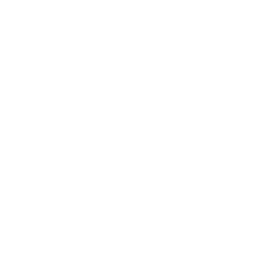

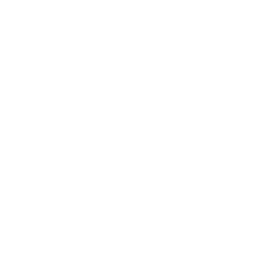

In [383]:
# Prepare animation:
from IPython.display import display, clear_output, display_png
from IPython.core.pylabtools import print_figure
from IPython.html.widgets import Latex, Image, HBox, FlexBox
import time

fig, ax1 = plt.subplots(1, 1, figsize=(4, 4))

_ = ax1.xaxis.set_visible(False)
_ = ax1.yaxis.set_visible(False)
#_ = ax1.set_xlim((-1,1))
#_ = ax1.set_ylim((-1,1))

# Reset plots
#sc_in, = ax1.plot([], [], ls='', ms=3, marker='.', color=b)
#sc_out, = ax1.plot([], [], ls='', ms=3, marker='.', color=r)
res = 500
image = np.ones((res**2))*0.
colormap = cm.colors.ListedColormap([[1,1,1,0], b, r])

imshow = ax1.imshow(image.reshape(res,res).astype(int), 
                    cmap=colormap, interpolation='nearest', aspect='auto', vmin=0, vmax=2)

title = ax1.set_title('', fontsize=20)

# Reset the counters:
nums = np.array([0., 0.])

# Make image show
im = Image(value=print_figure(fig))

# Weirly it shows the fig always, although never called for...
fig

In [385]:
# Make animation function:
def animate(i):
    samples = np.random.uniform(-1, 1, (1e4, 2))
    w = np.sqrt(np.einsum('ij,ij->i', samples, samples)) <= 1
    nums[0] += w.sum()
    nums[1] += w.size
    sc_in = (res*(samples[w]+1)/2.).astype(int)
    sc_out = (res*(samples[~w]+1)/2.).astype(int)

    #image[sc_in]
    #return sc_in, sc_out
    image[sc_in[:,0]*500 + sc_in[:,1]] = 1
    image[sc_out[:,0]*500 + sc_out[:,1]] = 2

    imshow.set_data(image.reshape(res,res))
    #imshow.set_data(image.reshape(res,res))

In [386]:
display(im)

for i in range(200):
    animate(i)
    #l.value = r'{:.5f}'.format(4.*nums[0]/nums[1])
    title.set_text('$\pi\sim{}$'.format(4.*nums[0]/nums[1]))
    #im.value = print_figure(fig)
    #display(im)
    im.value = print_figure(fig)
    time.sleep(.5)

In [348]:
ax1.imshow?